In [70]:
from datetime import date
from random import uniform
from random import choice
import importlib

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

from pynet import *
from stockmanager import *


importlib.reload(util)
importlib.reload(portfolio)
importlib.reload(stock)
importlib.reload(network)
importlib.reload(netutil)

<module 'pynet.netutil' from '/Users/xlanzhou/Desktop/Richard/stocks/pynet/netutil.py'>

In [129]:
# get X and y from 2005 to 2010

X = [item[4] for item in util.getStockPrice('CVX', date(2005, 1, 4), date(2010, 1, 4))]
sma = util.calculateSMA(X, 20)

y = util.createTrainingData('CVX', date(2005, 1, 4), date(2010, 1, 4), 30, 20)

In [130]:
# train nn with stock data

nn = MLPRegressor(activation='logistic')

nn.fit(
    [[X[j] for j in range(i, i + 30)] for i in range(len(X[:1100]))],
    [[y[i]] * 30 for i in range(len(y[:1100]))],
)

nn.score(
    [[X[j] for j in range(i, i + 30)] for i in range(len(X[1100:1200]))],
    [[y[i]] * 30 for i in range(len(y[1100:1200]))]
)

0.57813515636557977

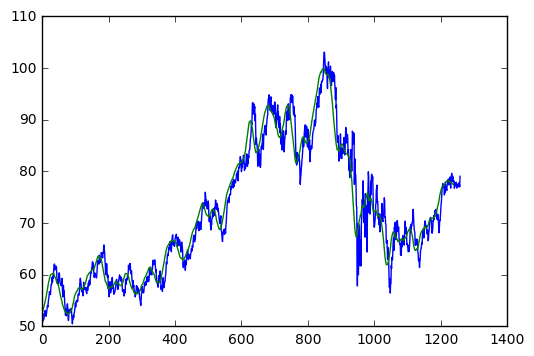

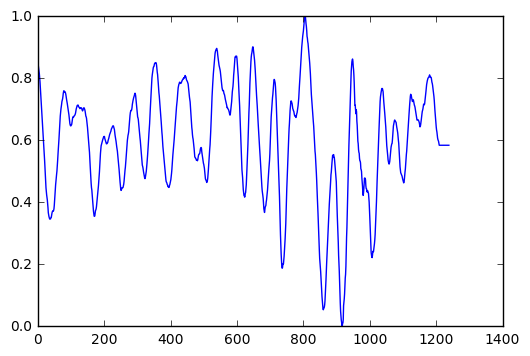

In [131]:
# Plot graphs of raw stock data & simple moving average (X) and training data (y)
plt.plot(X)
plt.plot(sma)
plt.show()

plt.plot(y)
plt.show()

In [101]:
# train with xor function for baseline score


X = []
y = []
for _ in range(10000):
    a = choice([1, 10])
    b = choice([1, 10])
    X.append([a, b])
    y.append(1 if a == b else 10)


nn = MLPRegressor(activation='logistic')

nn.fit(
    X[:9000],
    y[:9000]
)

nn.score(
    X[9000:10000],
    y[9000:10000]
)

0.99999917557631968

In [102]:
nn.predict([[1, 10]])

array([ 9.99643368])

In [128]:
# download stock data for use in getting stock price

util.downloadStockData('CVX', date(2005, 1, 4), date(2010, 1, 4))

1259
